# Dealing with Outliers

Sometimes outliers can mess up an analysis; you usually don't want a handful of data points to skew the overall results. Let's revisit our example of income data, with some random billionaire thrown in:

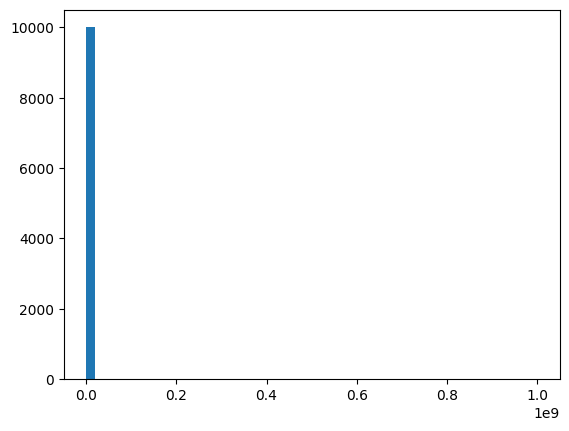

In [1]:
%matplotlib inline

import numpy as np

# Gera um conjunto de dados com 10.000, media de 27.000 e desvio padrão de 15.000
incomes = np.random.normal(27000, 15000, 10000)

# Adiciona um valor extremo (outlier) aos dados
incomes = np.append(incomes, [1000000000])

import matplotlib.pyplot as plt

# Cria um histograma para visualizar a distribuição dos rendimentos
plt.hist(incomes, 50)

plt.show()


That's not very helpful to look at. One billionaire ended up squeezing everybody else into a single line in my histogram. Plus it skewed my mean income significantly:

In [2]:
#media dos dados
incomes.mean()

126946.58186539897

It's important to dig into what is causing your outliers, and understand where they are coming from. You also need to think about whether removing them is a valid thing to do, given the spirit of what it is you're trying to analyze. If I know I want to understand more about the incomes of "typical Americans", filtering out billionaires seems like a legitimate thing to do.

Here's something a little more robust than filtering out billionaires - it filters out anything beyond two standard deviations of the median value in the data set:

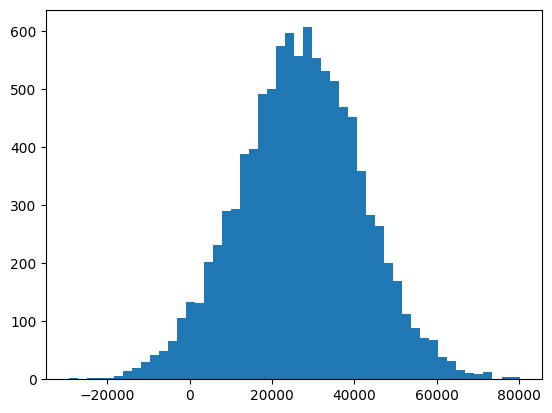

In [3]:
def reject_outliers(data):
    u = np.median(data)  # Calcula a mediana dos dados
    s = np.std(data)     # Calcula o desvio padrão dos dados
    # Filtra os dados mantendo apenas os valores dentro de 2 desvios padrão da mediana
    filtered = [e for e in data if (u - 2 * s < e < u + 2 * s)]
    return filtered

# Aplica a função de rejeição de outliers aos dados de rendimentos
filtered = reject_outliers(incomes)

# Cria um histograma dos dados filtrados, removendo os outliers
plt.hist(filtered, 50)

plt.show()


That looks better. And, our mean is more, well, meangingful now as well:

In [4]:
np.mean(filtered)

26959.276523585515

## Activity

Instead of a single outlier, add several randomly-generated outliers to the data. Experiment with different values of the multiple of the standard deviation to identify outliers, and see what effect it has on the final results.

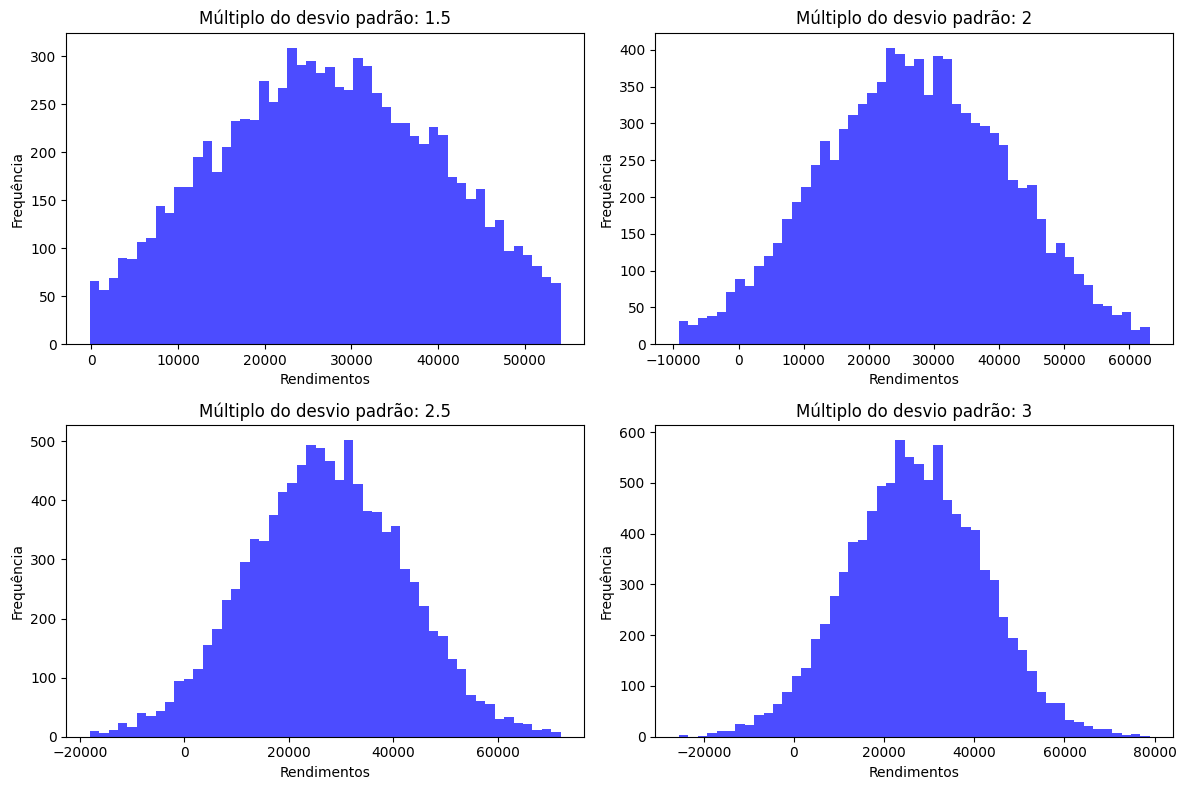

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


incomes = np.random.normal(27000, 15000, 10000)

# Adicionar vários outliers aleatórios ao conjunto de dados
outliers = np.random.uniform(200000, 500000, 10)  
incomes = np.append(incomes, outliers)

# Função para rejeitar outliers com múltiplos ajustáveis do desvio padrão
def reject_outliers(data, multiple=2):
    u = np.median(data)  # Mediana dos dados
    s = np.std(data)     # Desvio padrão dos dados
    # Filtrar dados com base no múltiplo ajustável
    filtered = [e for e in data if (u - multiple * s < e < u + multiple * s)]
    return filtered

# Experimentar diferentes múltiplos do desvio padrão
multiples = [1.5, 2, 2.5, 3]

plt.figure(figsize=(12, 8))

# Plotar os resultados para diferentes múltiplos
for i, multiple in enumerate(multiples, start=1):
    filtered = reject_outliers(incomes, multiple)
    plt.subplot(2, 2, i)  
    plt.hist(filtered, 50, color='blue', alpha=0.7)
    plt.title(f"Múltiplo do desvio padrão: {multiple}")
    plt.xlabel('Rendimentos')
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()
